# Design a MLP to classify two clusters of data (x1, x2) drawn from Normal(2, 1) and Normal(-2, 1) 

Ref: 莫煩 Moven  https://www.youtube.com/watch?v=Qm3zzq-xeDI&index=12&list=PLXO45tsB95cJxT0mL0P3-G0rBcLSvVkKH

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display

# Training data: X = X0+X1,  Y=Y0+Y1

In [2]:
n_data = torch.ones(100, 2) # float tensor of size 100x2
x0 = torch.normal(2*n_data, 1) # x, y coordinates for class 0
x1 = torch.normal(-2*n_data, 1)  # x, y coordinates for class 1
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) # merge class 0, 1 data into training set
print(x.shape)

torch.Size([200, 2])


In [3]:
y0 = torch.zeros(100) # label of x0 = 0
y1 = torch.ones(100) # label of x1
y = torch.cat((y0, y1), ).type(torch.LongTensor) # merge class 0, 1 labels 
print(y.shape)

torch.Size([200])


In [4]:
x, y = Variable(x), Variable(y)

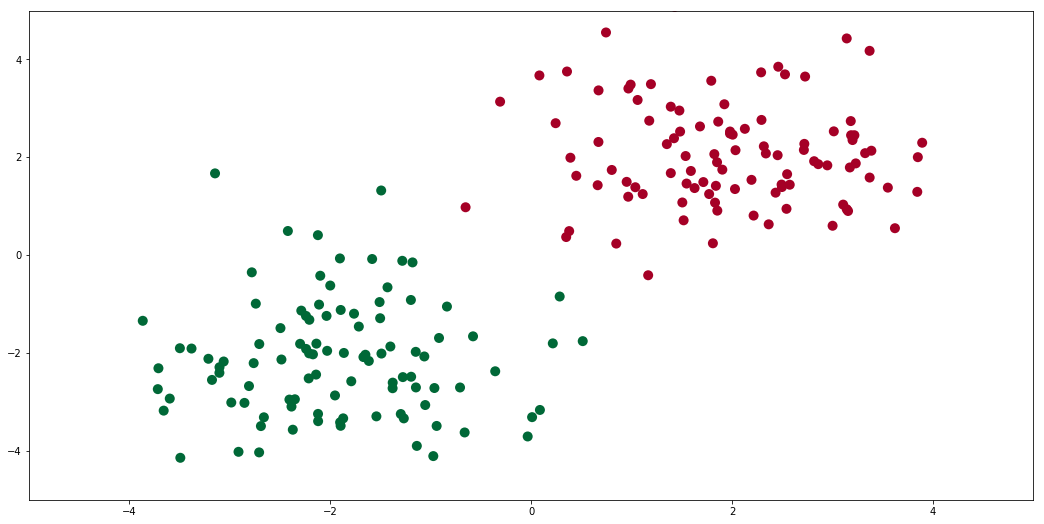

In [5]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.axis([-5, 5, -5, 5]) #minX, maxX, minY, maxY
plt.show()

# Build a MLP with 1 hidden layer with 10 neurons

In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [7]:
net = Net(2, 10, 2)

In [8]:
net

Net(
  (hidden): Linear(in_features=2, out_features=10)
  (predict): Linear(in_features=10, out_features=2)
)

# Define optimization parameters

In [9]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

In [10]:
loss_func = torch.nn.CrossEntropyLoss()

# Visualize the NN optimization process

In [11]:
epoch = 0

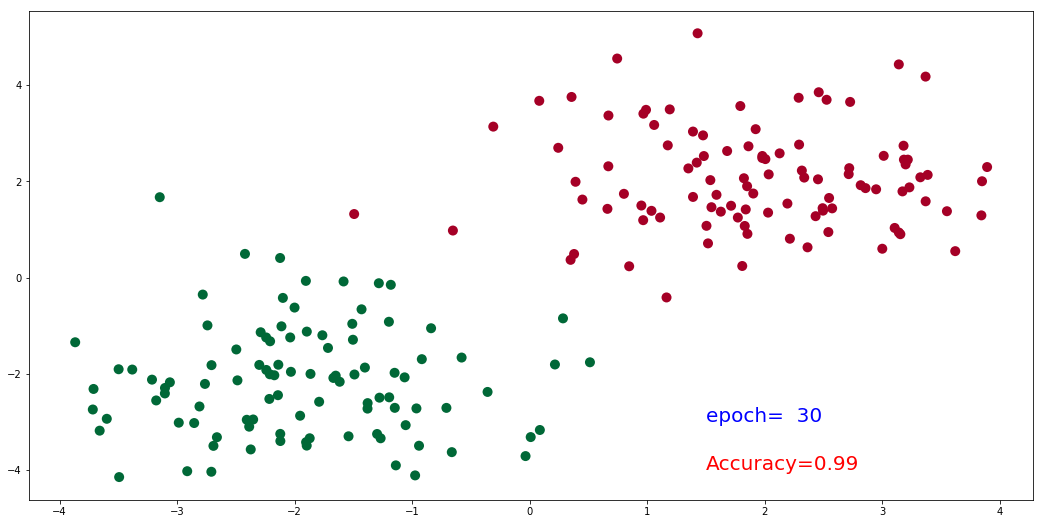

In [12]:
for t in range(30):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    epoch = epoch + 1
    display.clear_output(wait=True)
    plt.figure(figsize=(18,9))
    prediction = torch.max(F.softmax(out, 1), 1)[1]   
    pred_y = prediction.data.numpy().squeeze()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/200.
    plt.text(1.5, -3, 'epoch=%4d' % epoch, fontdict={'size':20, 'color': 'blue'})
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)